# Project Analysis - Cohort Analysis & Layer Cake Chart

## Proposal

**Aim**:

To conduct a cohort study of the paid and refunded amount of customers to monitor how acquired customers continue the product or service on a monthly or yearly basis and what does the montly revenue is highly dependent on.

**Objectives**:   

**Primary Objectives**: 

- To figure out the top 3 countries with the most customers

- To determine the user retention for each of the top 3 country with the use of a heatmap

- To determine the trend of customers that may have churned and acquired new customers over a fixed time period with the help of a layer cake chart

- To figure out if there was any activities contributed to the monthly revenue during the fixed time period
                
**Secondary Objectives**: 

- To compare the difference of user retention between 3 countries that how the amount of customers may affected

- To provide the basis for future research to improve products and service

**Steps involved in Cohort Analysis**:

1. Data loading and cleaning

2. Assigned the cohort and calculate

Step 2.1 

- Truncate data object into needed one (which is the first purchasing month)

- Create groupby object with target of unique customer id

- Transform with a min() function to figure out the smallest purchasing month

Step 2.2

- Create a groupby objet with CohortMonth and Cohort Index

- Count the number of customers in each group by applying the pandas nunique() function, also with num of paid and refunded

- Reset the index and create a pandas aggregate with paid, refunded and customer

Step 3

Calculate matrices: Retention rate and transform it into heatmap.

Step 4

Generate layer cake chart based on customers and first purchasing date

## Introduction

  **In the 21st century, customers' data are becoming more and more essential, SaaS companies will be able to provide the most appropriate service to customers based on them. For this report, we are going to figure out whether the amount of revenue (paid - refunded) is related to the country that they come from. We assume that the more developed the country is, the more people are likely to spend money.**

**As we all know that US is one of the most powerful countries around the world, so our expected analysis outcome based on what we assume is citizens from US tend to spend more money. As cohort analysis gives the user an understanding of the why, how, and when of customer's actions that helps the user to make decisions, by conducting  cohort analysis, we can conclude whether there is a positive correlation that can fit our assumption.**

**To avoid bias and any other side effects, we will conduct cohort analysis on the other two top countries from the list to ensure our conclusion is evidential and reliable.**

**For further progress, we will conduct a cohort layer cake chart with no geographic separation. Layer cake chart is another type of chart used by SaaS(Software as a service). As they need to monitor monthly recurring revenue and annual recurring revenue to make decisions, it is essential to use a layer cake chart to monitor customers on a monthly or yearly basis.**

## Retrieve Dataset

Datasets: customer details in 2020: https://github.com/shy1213/Project/blob/main/customer.csv

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline
print('Libraries imported')

Libraries imported


In [17]:
df = pd.read_csv('/Users/shy/Downloads/customer.csv')
df['card__country'] = df.groupby(['customer'])['card__country'].ffill()
df['created'] = pd.to_datetime(df['created'], format = '%Y-%m-%d %H:%M:%S')
df.groupby(['card__country'])['customer'].count().sort_values().tail(3)


card__country
CA     256
AU     307
US    1685
Name: customer, dtype: int64

Data loading and cleaning

In [18]:
df.set_index('customer', inplace = True)

df['CohortGroup'] = df.groupby(level = 0)['created'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace = True)

def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [19]:
import seaborn as sns
def heat_map(cohort_analysis):
    sns.set(style = 'white')

    plt.figure(figsize = (12, 8))
    plt.title('Cohorts: User Retention')
    sns.heatmap(cohort_analysis.T, mask = cohort_analysis.T.isnull(), annot = True, fmt = '.0%')

In [20]:
def Cohort_Analysis(country):
    data_set_country = df[df['card__country'] == country]
    data_set_country['Period'] = data_set_country['created'].apply(lambda x: x.strftime('%Y-%m'))
    data_set_country.set_index('customer', inplace = True)
    data_set_country['CohortGroup'] = data_set_country.groupby(level = 0)['created'].min().apply(lambda x: x.strftime('%Y-%m'))
    data_set_country.reset_index(inplace = True)
    
    
    grouped = data_set_country.groupby(['CohortGroup', 'Period'])
    cohorts = grouped.agg({'paid': np.sum,
                      'refunded': np.sum,
                      'customer': pd.Series.nunique})

    cohorts = cohorts.groupby(level = 0).apply(cohort_period)
    cohorts.reset_index(inplace = True)
    cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace = True)

    cohort_group_size = cohorts['customer'].groupby(level = 0).first()
    user_retention = cohorts['customer'].unstack(0).divide(cohort_group_size, axis = 1)
    
    return user_retention

### US Cohort Analysis

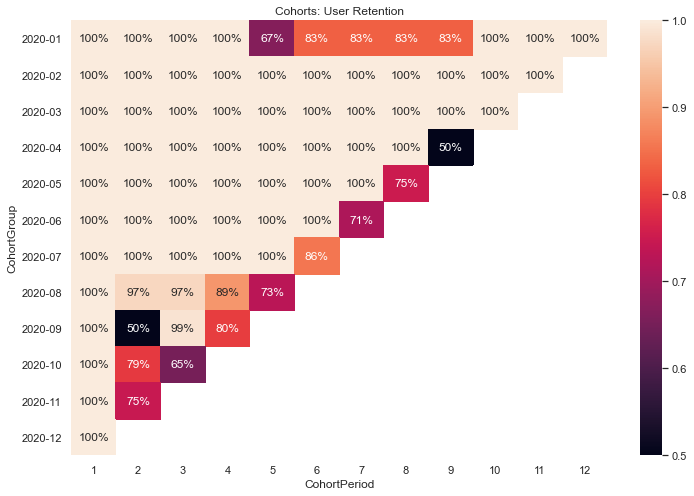

In [21]:
heat_map(Cohort_Analysis('US'))

We are able to see the first period (column) of each cohort is 100% as we assume each customer purchased in month 1. We can see from the above chart that fewer users tend to purchase as time goes on with purchaseing month other than 2020-02 and 2020-03. Over the rest month, we see that 2020-09 cohort month in 3rd cohort index with 99%, which means that 99% of customer purchased in Sep 2020 and again 3 months later. The lowerst is 2020-04 cohort month in 9th cohort index with 50%, only 50% of customers returned to purchase 9 months after April 2020. In addition, we see that many indices have a value of 100%, this usually not happen in real life. The reason to cause this problem is our data set is not big enough.

### AU Cohort Analysis

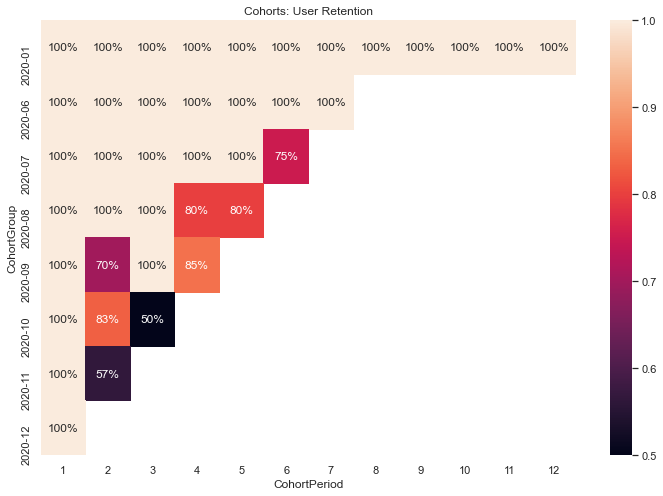

In [22]:
heat_map(Cohort_Analysis('AU'))

We are able to see the first period (column) of each cohort is 100% as we assume each customer purchased in month 1. We can see from the above chart that fewer users tend to purchase as time goes on with purchaseing month other than 2020-01 and 2020-06. Over the rest month, we see that 2020-09 cohort month in 4th cohort index with 85%, which means that 85% of customer purchased in Sep 2020 and again 4 months later. The lowerst is 2020-10 cohort month in 3rd cohort index with 50%, only 50% of customers returned to purchase 3 months after Oct 2020. Aside from the above, we find that there are fewer rows in this chart, which means no customer purchased from Jan to June in AU. This is not likely to happen in real life as huge datasets will make exceptions.

###  CA Cohort Analysis

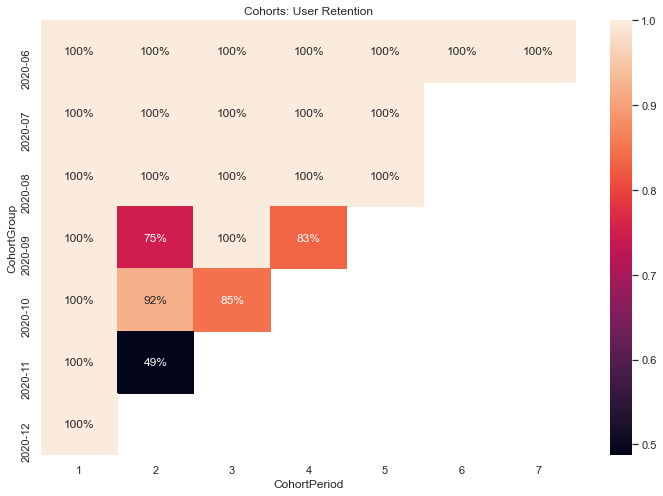

In [23]:
heat_map(Cohort_Analysis('CA'))

We are able to see the first period (column) of each cohort is 100% as we assume each customer purchased in month 1. We can see from the above chart that fewer users tend to purchase as time goes on with purchaseing month other that 2020-06, 2020-07 and 2020-08. Over the rest month, we see that 2020-10 cohort month in 2nd cohort index with 92%, which means that 92% of customer purchased in Oct 2020 and again 2 months later. The lowerst is 2020-11 cohort month in 2nd cohort index with 49%, only 49% of customers returned to purchase 2 months after Nov 2020.

## Layer Cake Chart 

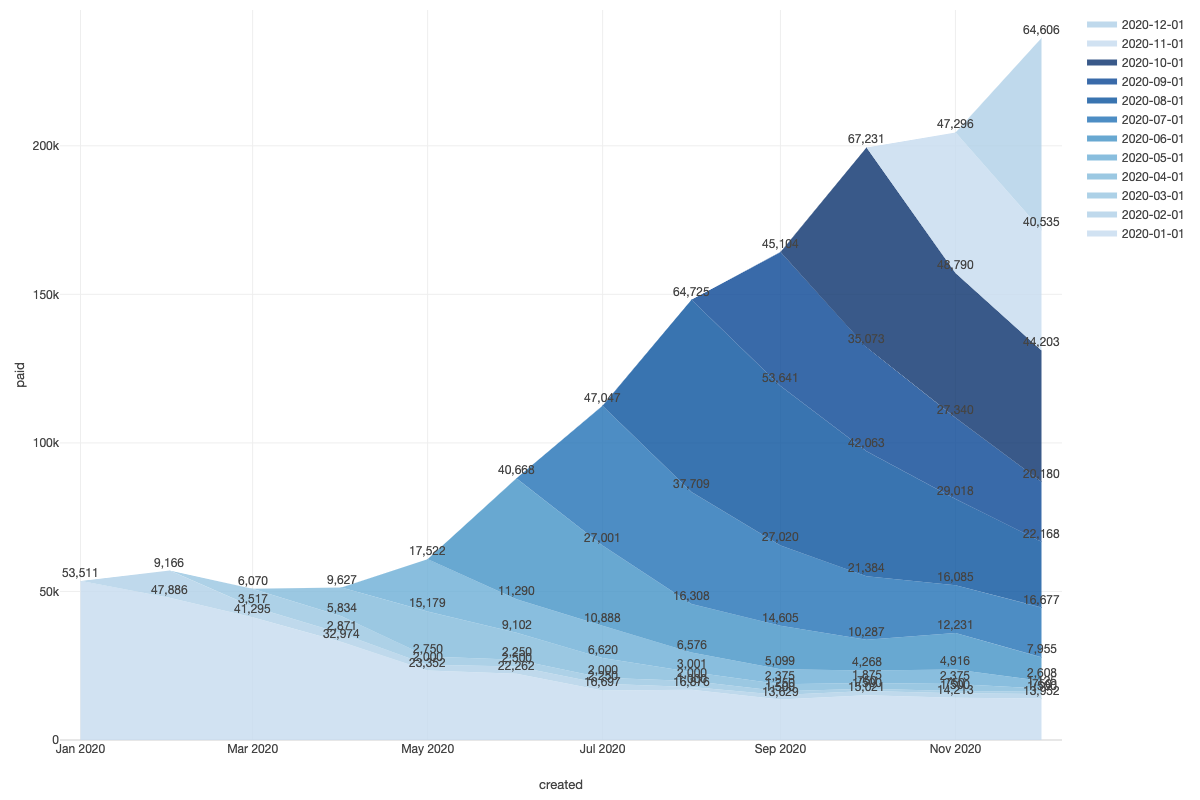

In [24]:
from IPython import display
display.Image("/Users/shy/Downloads/Cake_Chart.png")

From the graph, it could be seen that monthy revenue is highly dependent on repeat business. It seems like there was activities like promo happended in Nov 2020 and a few cohorts responded. This is a great customer retention chart as cohort band remains strong over time 

##  Discussion

From my previous work, I didn't focus carefully on the missing values that many customers don't have their corresponding card_countries. As a result of that, all three of my cohort analysis charts look absurd and this kind of issue happens a lot in real life, that data might not be arranged nice and neat. Therefore, I filled in those missing values and my charts start to seem reasonable and can be analyzed. Also, I used several for loops in my draft work. They can be time-wasting when dealing with huge datasets and I turned to use built-in functions to do data cleaning and analysis. Cohort analysis is useful and essential to business companies as it's a kind of descriptive analytics that able to reflect user retention correctly and clearly.